In [5]:
titration_volumes = []
for i in range(0,50+1):
    titration_volumes.append(round(i*0.001,4))
print(titration_volumes)

[0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035, 0.036, 0.037, 0.038, 0.039, 0.04, 0.041, 0.042, 0.043, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049, 0.05]


The titration values

In [6]:
Kb = 1e-5
Ka = 1e-14/Kb
C1 = 1
C2 = 1
V = 0.025

C1 Base Conc in moldm-3<br>
C2 Acid Conc in moldm-3<br>
V initial acid volume in dm3<br>

In [7]:
def get_base_salt(v):
    mol1 = V*C1
    mol2 = v*C2
    total_v = v+V
    if mol1 > mol2:
        return [(mol1-mol2)/total_v,mol2/total_v]
    return [-(mol2-mol1)/total_v,mol1/total_v]

When given acid volume calculates the remaining base and salt conc

In [8]:
base_salt_conc = []
for i in titration_volumes:
    base_salt_conc.append(get_base_salt(i))
    print(i," -> ", round(get_base_salt(i)[0],4), " | ",round(get_base_salt(i)[1],4))

0.0  ->  1.0  |  0.0
0.001  ->  0.9231  |  0.0385
0.002  ->  0.8519  |  0.0741
0.003  ->  0.7857  |  0.1071
0.004  ->  0.7241  |  0.1379
0.005  ->  0.6667  |  0.1667
0.006  ->  0.6129  |  0.1935
0.007  ->  0.5625  |  0.2188
0.008  ->  0.5152  |  0.2424
0.009  ->  0.4706  |  0.2647
0.01  ->  0.4286  |  0.2857
0.011  ->  0.3889  |  0.3056
0.012  ->  0.3514  |  0.3243
0.013  ->  0.3158  |  0.3421
0.014  ->  0.2821  |  0.359
0.015  ->  0.25  |  0.375
0.016  ->  0.2195  |  0.3902
0.017  ->  0.1905  |  0.4048
0.018  ->  0.1628  |  0.4186
0.019  ->  0.1364  |  0.4318
0.02  ->  0.1111  |  0.4444
0.021  ->  0.087  |  0.4565
0.022  ->  0.0638  |  0.4681
0.023  ->  0.0417  |  0.4792
0.024  ->  0.0204  |  0.4898
0.025  ->  -0.0  |  0.5
0.026  ->  -0.0196  |  0.4902
0.027  ->  -0.0385  |  0.4808
0.028  ->  -0.0566  |  0.4717
0.029  ->  -0.0741  |  0.463
0.03  ->  -0.0909  |  0.4545
0.031  ->  -0.1071  |  0.4464
0.032  ->  -0.1228  |  0.4386
0.033  ->  -0.1379  |  0.431
0.034  ->  -0.1525  |  0.4237

In [9]:
def solve_x(a,b,c):
    return (pow((pow(b,2)-4*a*c),0.5)-b)/2*a

Solves a polynomial equation

In [10]:
import math
def calc_pH(conc):
    return -1*math.log(conc,10)
    
def calc_pOH(conc):
    return -1*math.log(conc,10)

Calculates by the concentration

In [11]:
pH_values = []
for concs in base_salt_conc:
    if(concs[0] > 0):
        oh_conc = solve_x(1,(concs[1]+Kb),-Kb*concs[0])
        pH_values.append(14-calc_pOH(oh_conc))
    else:
        h_conc = solve_x(1,(-1*concs[0])+Ka,-Ka*concs[1])+(-1*concs[0])
        pH_values.append(calc_pH(h_conc))


In [12]:
for i in pH_values:
    print(i)

11.499313320417087
10.377414744579681
10.05996671828434
9.864964003476096
9.71996263309731
9.601929753765738
9.500508881967932
9.410103573986268
9.327302959626817
9.24983190455519
9.176053261945121
9.104703050171576
9.034734210698023
8.965213482082415
8.895243046556136
8.82388943974029
8.750105138636751
8.672625287217546
8.589811125821534
8.499384416382597
8.397927794379651
8.279829371649038
8.134688030748794
7.939292308105517
7.619779522086347
4.650524708951828
1.7075696223735601
1.4149732068251841
1.2471545509433433
1.1303337318514144
1.0413926612720308
0.9700367597333281
0.9107768030282426
0.8603379967315097
0.8166094942943706
0.7781512438692265
0.743937144378996
0.7132104387759317
0.6853971930993261
0.6600519347603881
0.6368220944506031
0.6154239500867802
0.5956258788054477
0.5772364053242248
0.5600954877091965
0.5440680424502374
0.5290390522371454
0.5149098139939176
0.5015950226045882
0.48902047662450066
0.47712125341677897


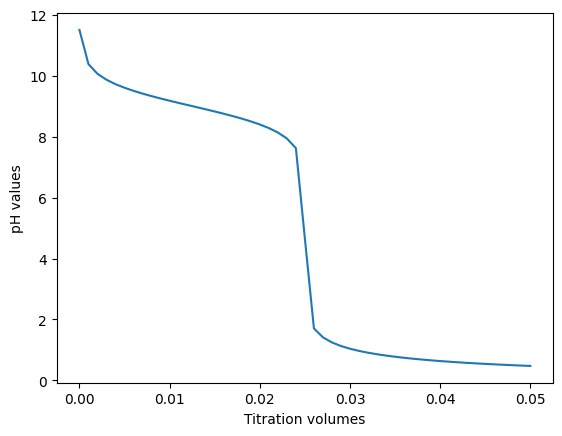

In [13]:
import matplotlib.pyplot as plt
# plt.plot(titration_volumes, pH_values)
plt.plot(titration_volumes, pH_values)
plt.xlabel('Titration volumes')
plt.ylabel('pH values')
plt.show()